In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

100%|██████████| 656M/656M [00:29<00:00, 23.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5


In [31]:
#importing necessary library
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


In [32]:
#ensuring the gpu is used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("gpu is being use")
else:
  print("gpu is not used")

gpu is being use


In [35]:
# path to data set
dataset_path = "/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals"

#list all the class of animal types
classes = os.listdir(dataset_path)
num_classes = len(classes)

#display number of class and all names
print(f'Number of classes: {num_classes}')
print(f'Types of classes: {classes}')


Number of classes: 90
Types of classes: ['otter', 'turkey', 'caterpillar', 'owl', 'sandpiper', 'fox', 'pigeon', 'sheep', 'crab', 'hare', 'squirrel', 'gorilla', 'snake', 'bison', 'butterfly', 'jellyfish', 'seahorse', 'boar', 'okapi', 'kangaroo', 'chimpanzee', 'pelecaniformes', 'zebra', 'antelope', 'ox', 'hummingbird', 'beetle', 'bear', 'octopus', 'goldfish', 'cockroach', 'turtle', 'dog', 'lizard', 'porcupine', 'mosquito', 'swan', 'koala', 'duck', 'hornbill', 'coyote', 'wombat', 'bat', 'panda', 'raccoon', 'woodpecker', 'rat', 'sparrow', 'hedgehog', 'cat', 'elephant', 'oyster', 'wolf', 'squid', 'parrot', 'badger', 'goose', 'mouse', 'seal', 'horse', 'donkey', 'rhinoceros', 'grasshopper', 'moth', 'hamster', 'crow', 'bee', 'tiger', 'flamingo', 'leopard', 'cow', 'lobster', 'orangutan', 'hyena', 'pig', 'penguin', 'dolphin', 'starfish', 'hippopotamus', 'deer', 'goat', 'dragonfly', 'fly', 'whale', 'lion', 'ladybugs', 'shark', 'reindeer', 'possum', 'eagle']


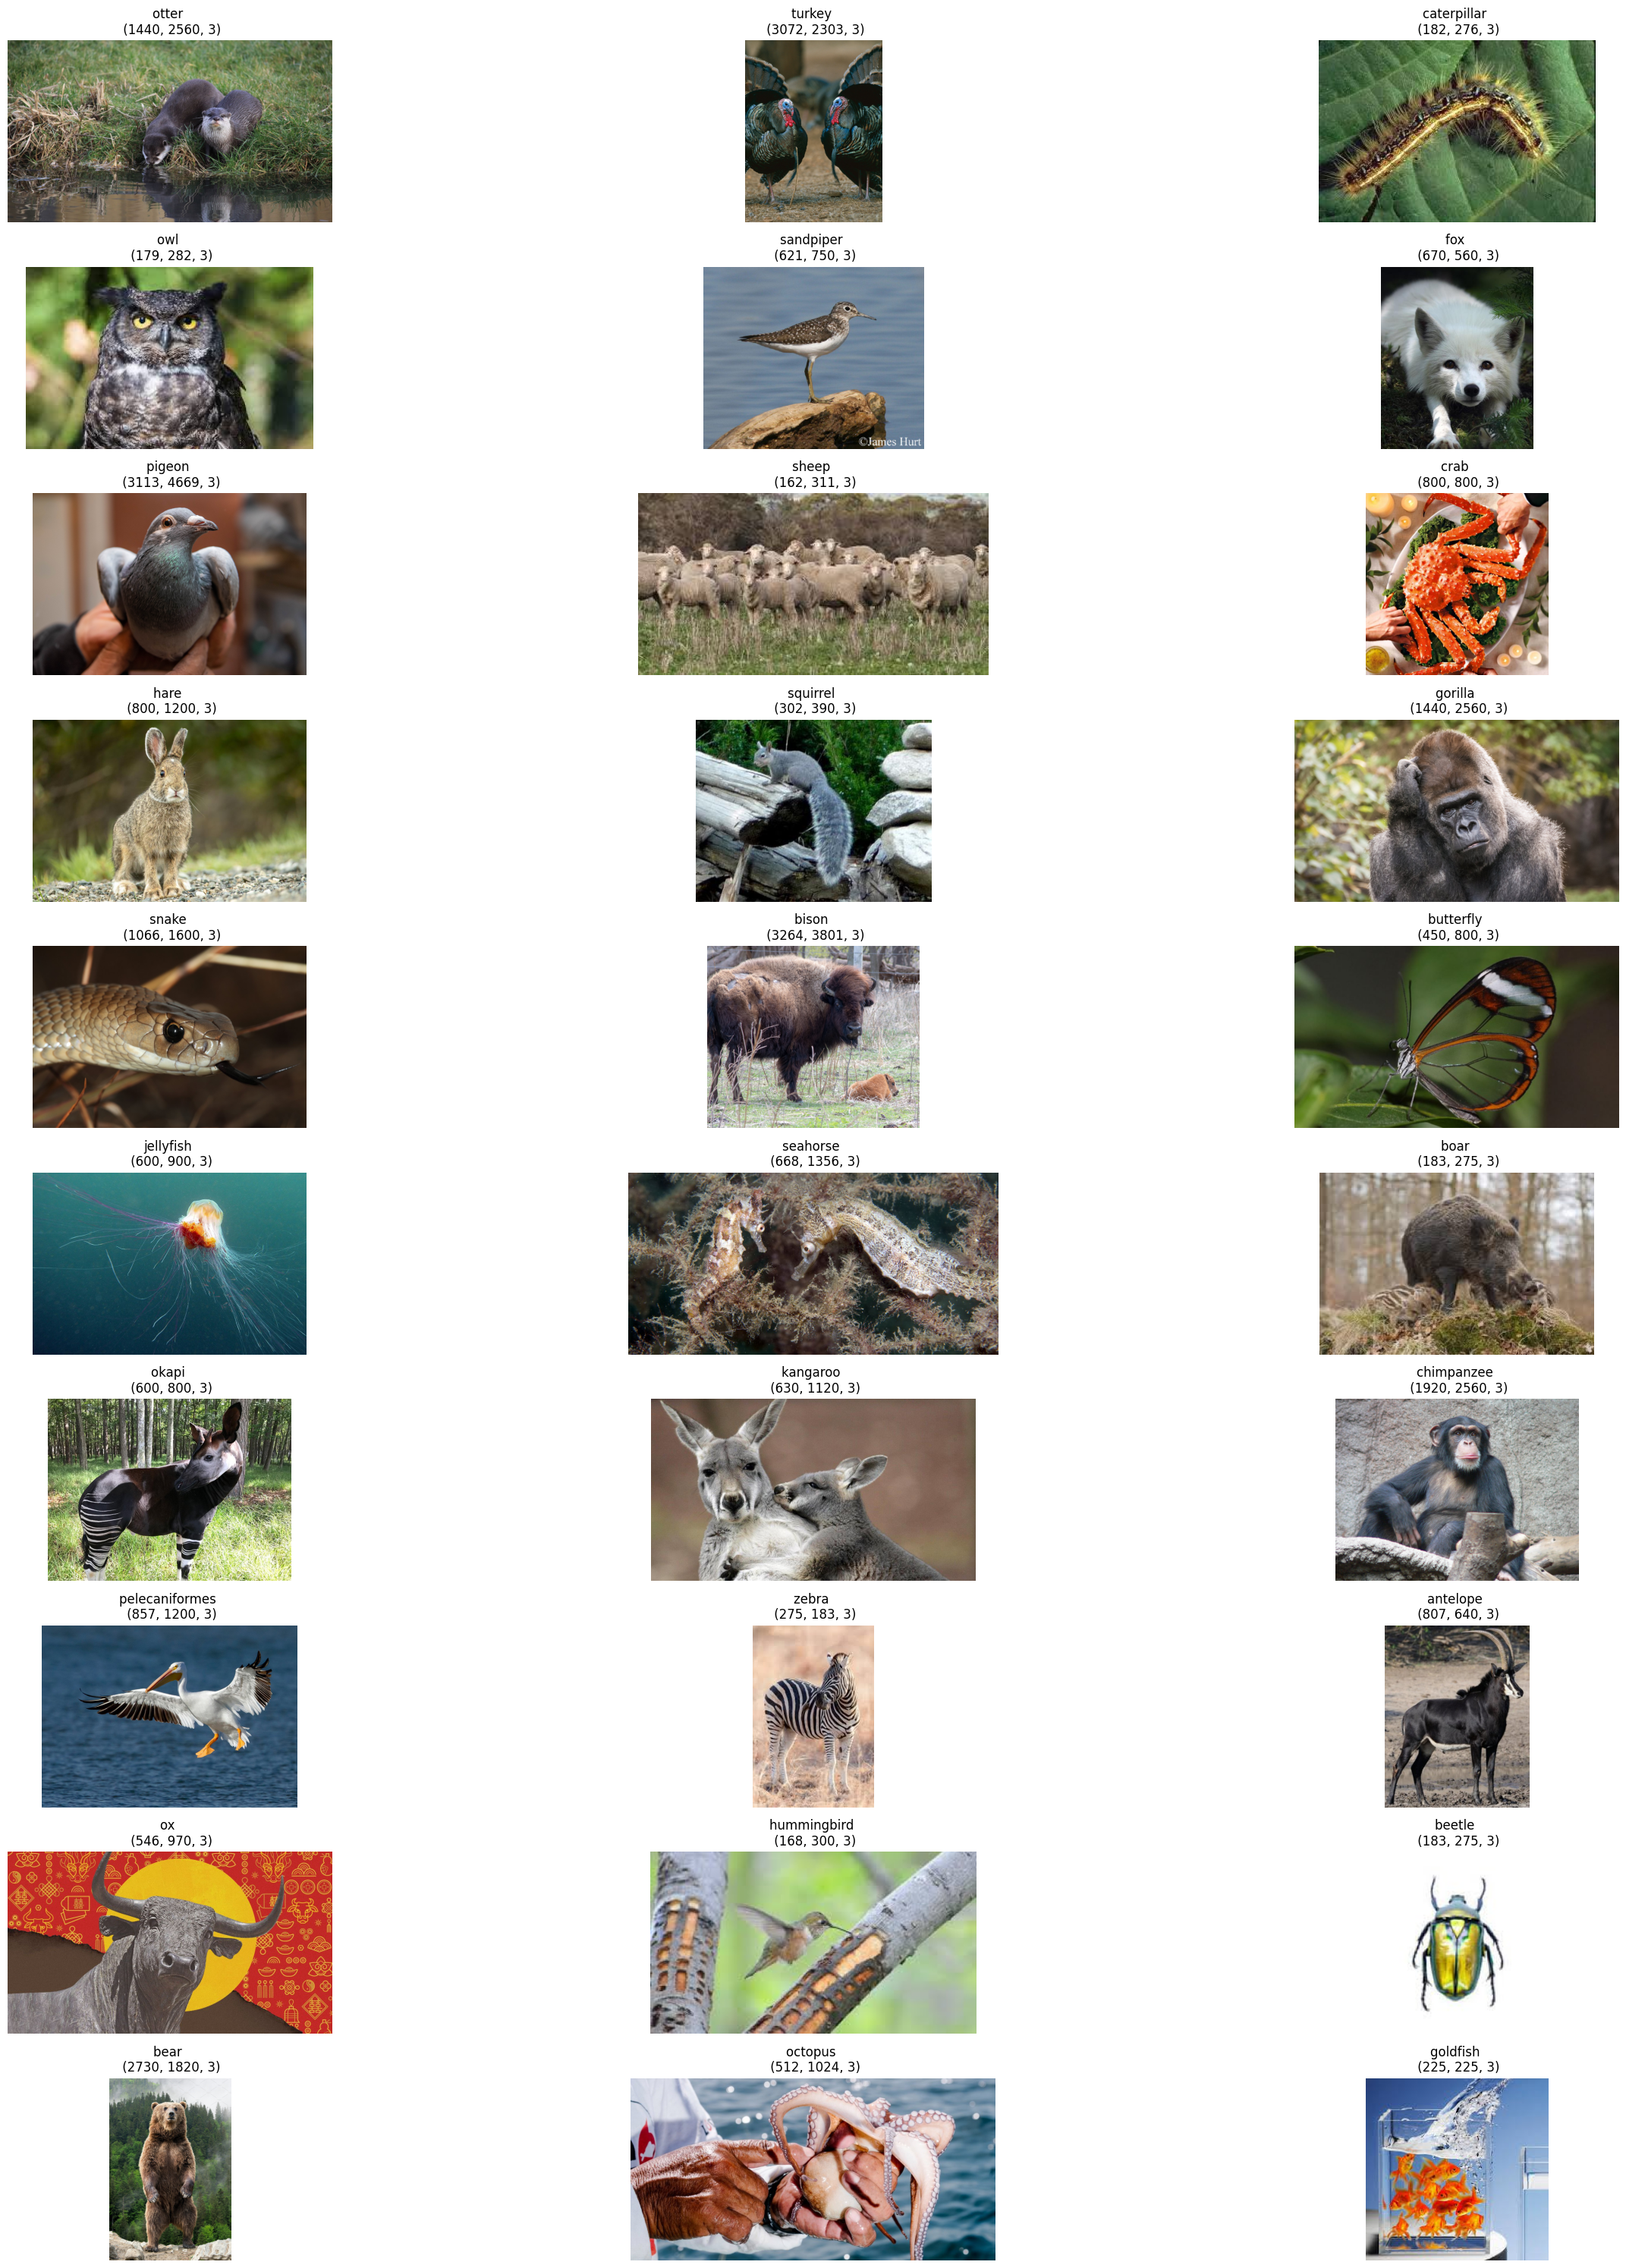

In [52]:
# visualize some sample images from classes
i= 0
plt.figure(figsize = (35 , 30))
for i , class_name in enumerate(classes[:30]):
  class_path = os.path.join(dataset_path, class_name)
  img_name = os.listdir(class_path)[0]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  #  # Calculate the row and column indices for the subplot
  # row = i // 5  # Divide by number of columns to get row index
  # col = i % 3   # Use modulo to get column index

  plt.subplot(10, 3, i+1)
  plt.imshow(img)
  plt.title(f'{class_name} \n {img.shape}')
  plt.axis('off')
  plt.tight_layout()
plt.show()
